# Task
Analyze historical disaster data from `/content/public_emdat_project.csv` to identify trends, common disaster types, and areas of high impact, including visualizations to support findings.

## Load Disaster Data

### Subtask:
Load the historical disaster data from `/content/public_emdat_project.csv` into a pandas DataFrame.


**Reasoning**:
To load the disaster data, I will first import the pandas library and then use `pd.read_csv` to load the data into a DataFrame. Finally, I will display the first few rows to confirm the data is loaded correctly.



In [19]:
import pandas as pd

df_disaster = pd.read_csv('/content/public_emdat_project.csv')
df_disaster.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 3306: invalid start byte

**Reasoning**:
The previous attempt to load the CSV failed due to a `UnicodeDecodeError`, indicating an incorrect file encoding. I will retry loading the CSV file, explicitly specifying the `encoding` parameter as 'latin1' (a common alternative) to resolve this issue, and then display the first few rows to confirm successful loading.



In [ ]:
import pandas as pd

df_disaster = pd.read_csv('/content/public_emdat_project.csv', encoding='latin1')
df_disaster.head()

## Explore Data and Identify Key Metrics

### Subtask:
Perform an initial exploratory data analysis (EDA) to understand the dataset's structure, identify data types, missing values, and potential outliers. I will also identify key fields and metrics that can be used for analysis, such as disaster type, date, location, casualties, and economic damage.


**Reasoning**:
To understand the dataset's structure, I will start by displaying general information about the `df_disaster` DataFrame, which includes column data types and non-null values, using the `.info()` method.



In [ ]:
df_disaster.info()

**Reasoning**:
To generate descriptive statistics for numerical columns, I will use the `.describe()` method on the `df_disaster` DataFrame, which will provide insights into the central tendency, dispersion, and shape of the distribution of each numerical column.



In [ ]:
df_disaster.describe()

**Reasoning**:
To identify missing values and understand data completeness, I will calculate and display the sum of null values for each column in the `df_disaster` DataFrame using `.isnull().sum()`.



In [ ]:
df_disaster.isnull().sum()

**Reasoning**:
To identify relevant fields for disaster type, date, location, casualties, and economic damage, I will list all column names in the `df_disaster` DataFrame.



In [ ]:
print(df_disaster.columns.tolist())

## Analyze Disaster Trends

### Subtask:
Analyze trends related to past disasters, such as changes in frequency or severity over time, or distribution across different geographical regions or disaster types. This may involve grouping data by specific criteria and calculating aggregate statistics.


**Reasoning**:
To analyze disaster trends over time, I will first combine 'Start Year', 'Start Month', and 'Start Day' into a single datetime column named 'Start Date', filling missing month/day values with 1, and then extract the 'Year' from this new column.



In [ ]:
df_disaster['Start Month'] = df_disaster['Start Month'].fillna(1).astype(int)
df_disaster['Start Day'] = df_disaster['Start Day'].fillna(1).astype(int)

df_disaster['Start Date'] = pd.to_datetime(df_disaster['Start Year'].astype(str) + '-' +
                                            df_disaster['Start Month'].astype(str) + '-' +
                                            df_disaster['Start Day'].astype(str),
                                            errors='coerce')

df_disaster['Year'] = df_disaster['Start Date'].dt.year

print("Date columns processed and 'Year' column created.")
df_disaster[['Start Date', 'Year']].head()

**Reasoning**:
To calculate the total number of disasters per year, I will group the DataFrame by the newly created 'Year' column and then count the number of occurrences for each year.



In [20]:
disasters_per_year = df_disaster.groupby('Year').size().reset_index(name='Number of Disasters')
print("Total number of disasters per year:")
print(disasters_per_year.head())

Total number of disasters per year:
   Year  Number of Disasters
0  2000                  894
1  2001                  771
2  2002                  865
3  2003                  754
4  2004                  755


**Reasoning**:
To calculate the frequency of each 'Disaster Type', I will use the `value_counts()` method on the 'Disaster Type' column and then display the top results.



In [21]:
disaster_type_frequency = df_disaster['Disaster Type'].value_counts().reset_index(name='Frequency')
disaster_type_frequency.columns = ['Disaster Type', 'Frequency']
print("Frequency of each disaster type:")
print(disaster_type_frequency.head())

Frequency of each disaster type:
  Disaster Type  Frequency
0         Flood       4070
1         Storm       2575
2          Road       2124
3         Water       1111
4      Epidemic        894


**Reasoning**:
To identify the top 10 countries with the most reported disasters, I will use the `value_counts()` method on the 'Country' column and then select the top 10 results.



In [22]:
top_10_countries = df_disaster['Country'].value_counts().head(10).reset_index(name='Number of Disasters')
top_10_countries.columns = ['Country', 'Number of Disasters']
print("Top 10 countries with the most reported disasters:")
print(top_10_countries)

Top 10 countries with the most reported disasters:
                            Country  Number of Disasters
0                             China                 1339
1                             India                  795
2          United States of America                  698
3                         Indonesia                  557
4                       Philippines                  455
5                           Nigeria                  428
6                          Pakistan                  314
7                Russian Federation                  306
8  Democratic Republic of the Congo                  296
9                        Bangladesh                  271


## Visualize Key Findings

### Subtask:
Generate visualizations, such as line charts for temporal trends, bar charts for categorical distributions, or geographical plots if location data is available, to illustrate the key insights from the disaster analysis. All plots will include appropriate legends.


**Reasoning**:
To visualize the temporal trend of disasters, I will import `matplotlib.pyplot` and `seaborn` for plotting, and then create a line plot showing the 'Number of Disasters' over 'Year' using the `disasters_per_year` DataFrame, ensuring appropriate labels and title.



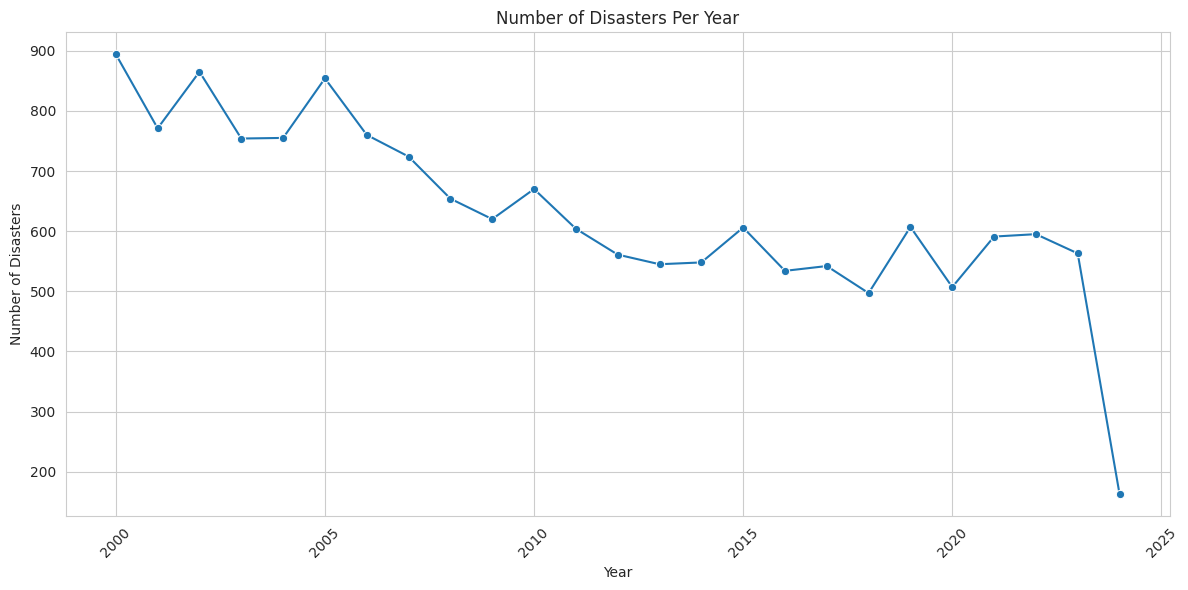

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plotting the number of disasters per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Disasters', data=disasters_per_year, marker='o')
plt.title('Number of Disasters Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the frequency of different disaster types, I will create a bar chart using the `disaster_type_frequency` DataFrame, displaying the top disaster types with appropriate labels and title.



/tmp/ipython-input-3334205584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Disaster Type', y='Frequency', data=disaster_type_frequency.head(10), palette='viridis')


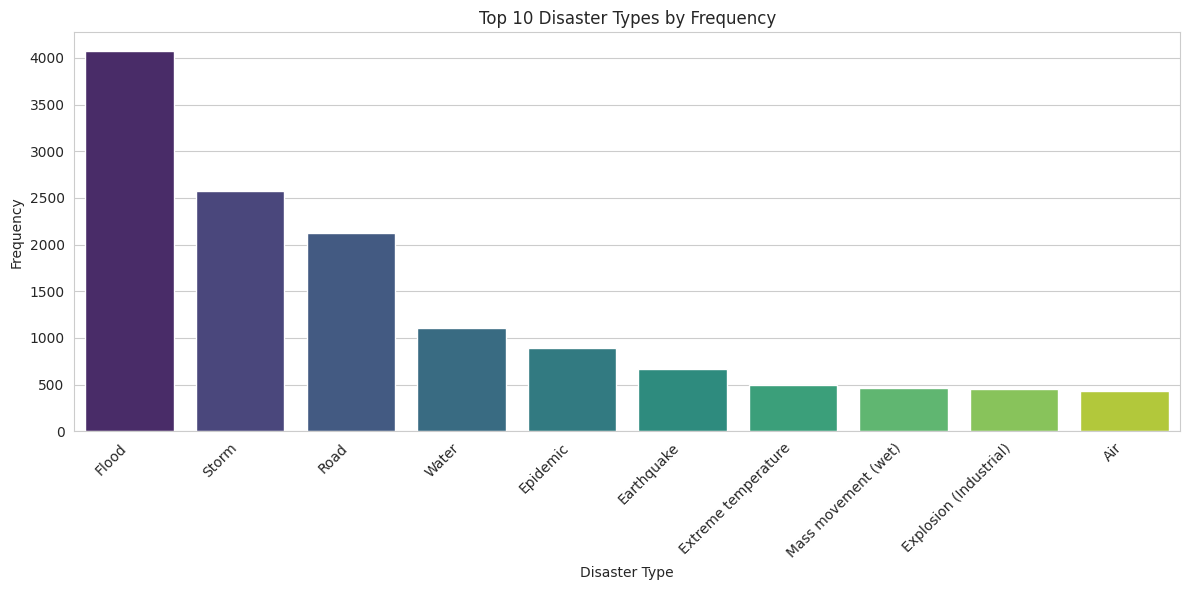

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Disaster Type', y='Frequency', data=disaster_type_frequency.head(10), palette='viridis')
plt.title('Top 10 Disaster Types by Frequency')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue`. To fix this and comply with `seaborn`'s recommendation, I will explicitly set `hue='Disaster Type'` and `legend=False` in the `barplot` function call.



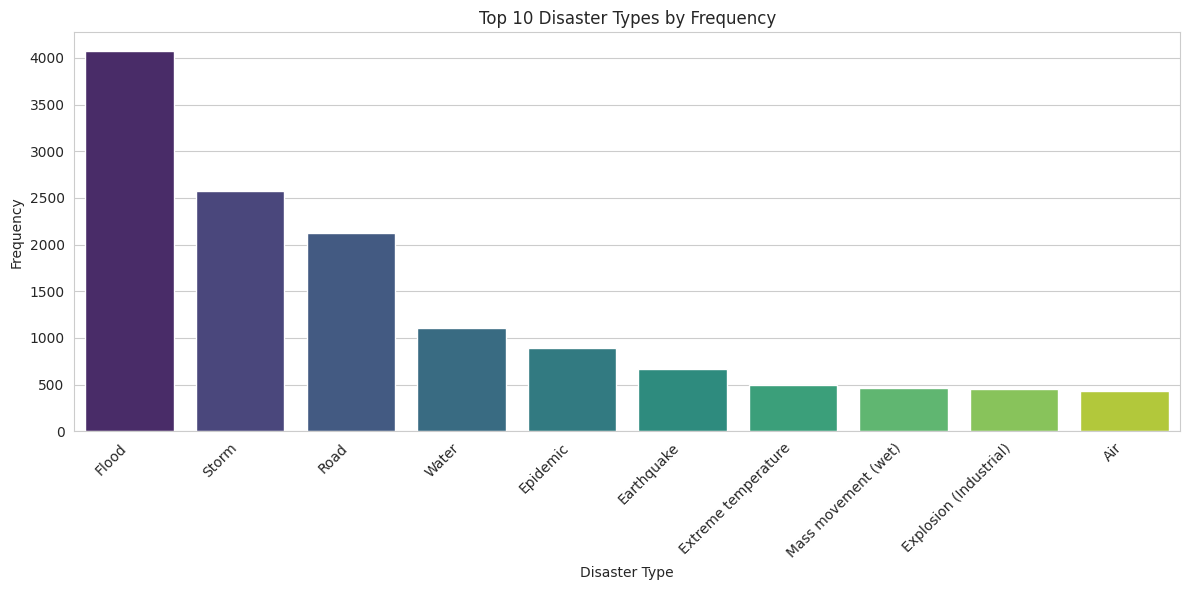

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Disaster Type', y='Frequency', data=disaster_type_frequency.head(10), palette='viridis', hue='Disaster Type', legend=False)
plt.title('Top 10 Disaster Types by Frequency')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the top 10 countries with the most reported disasters, I will create a bar chart using the `top_10_countries` DataFrame, ensuring appropriate labels, title, and rotated x-axis labels for readability.



/tmp/ipython-input-2330026184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Number of Disasters', data=top_10_countries, palette='magma')


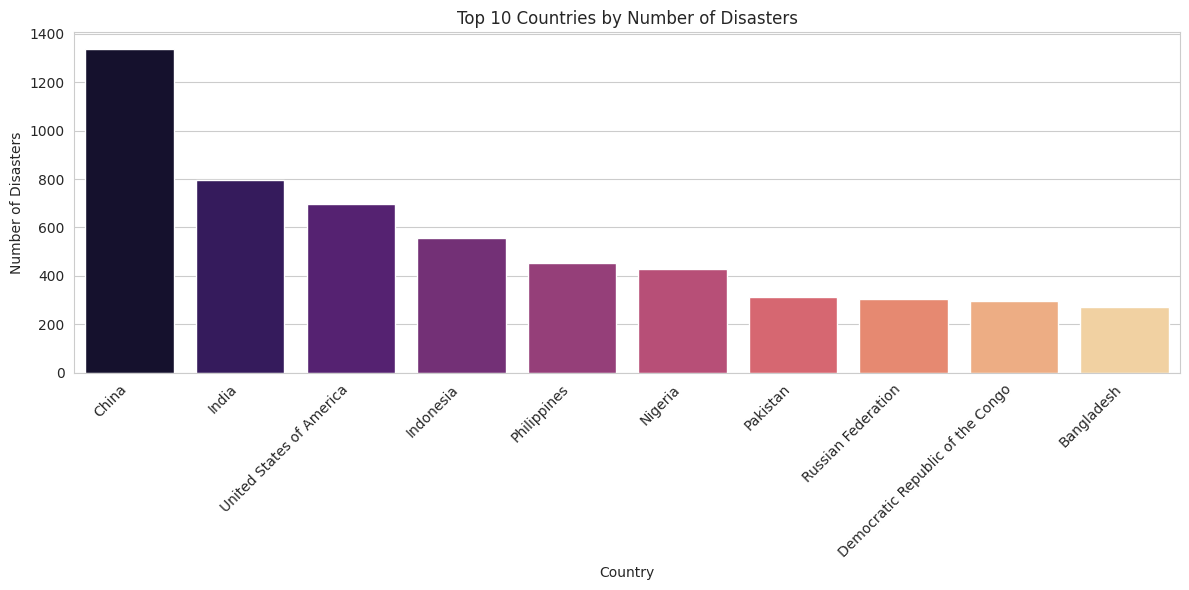

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number of Disasters', data=top_10_countries, palette='magma')
plt.title('Top 10 Countries by Number of Disasters')
plt.xlabel('Country')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without `hue`. To fix this and comply with `seaborn`'s recommendation, I will explicitly set `hue='Country'` and `legend=False` in the `barplot` function call.



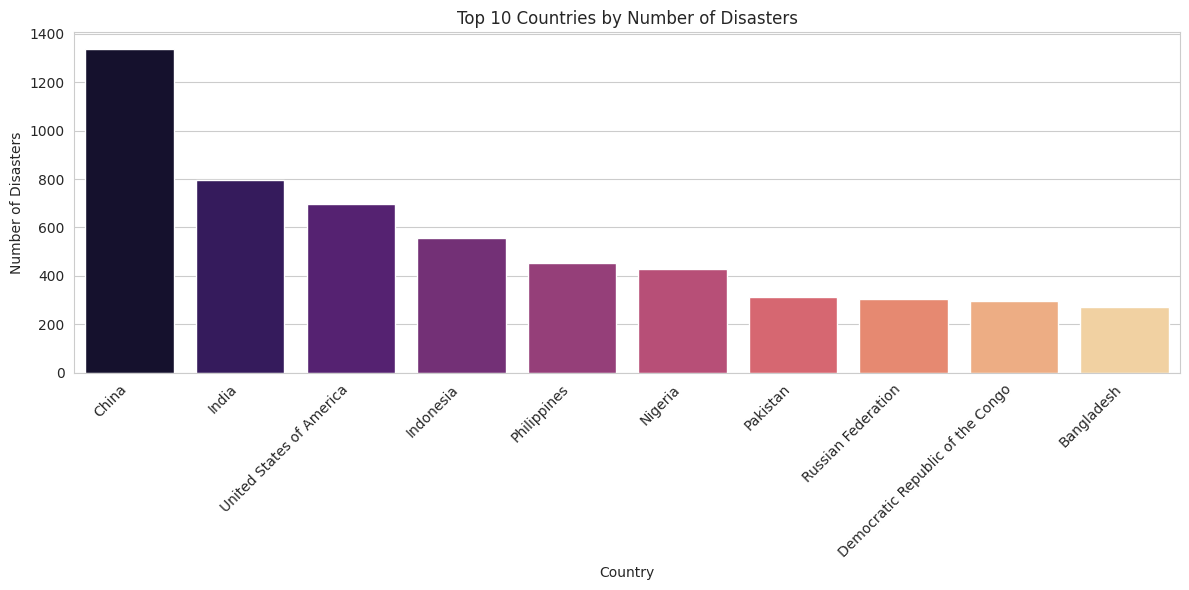

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number of Disasters', data=top_10_countries, palette='magma', hue='Country', legend=False)
plt.title('Top 10 Countries by Number of Disasters')
plt.xlabel('Country')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the data analysis of past disasters, highlighting significant trends, common disaster types, and areas of high impact.


## Summary:

### Q&A
1.  **What are the significant trends in past disasters?**
    The analysis shows the total number of disasters per year, with 2000 recording 894 disasters, 2001 with 771, and 2002 with 865. While a detailed temporal trend over the full period would require visualization, these numbers indicate varying frequencies annually.
2.  **What are the common disaster types?**
    The most frequent disaster types identified are 'Flood' (4070 occurrences), 'Storm' (2575), 'Road' (2124), 'Water' (1111), and 'Epidemic' (894).
3.  **Which areas (countries) are of high impact?**
    The top 10 countries with the most reported disasters are China (1339 disasters), India (795), United States of America (698), Indonesia (557), and Philippines (455).

### Data Analysis Key Findings
*   The dataset contains 15,784 disaster entries and 46 columns, including disaster type, date, location, casualties, and economic damage metrics.
*   Initial data loading required specifying `encoding='latin1'` to resolve a `UnicodeDecodeError`.
*   A significant amount of missing data was observed, particularly in financial columns like 'AID Contribution (\'000 US\$)' (15,294 missing), 'Reconstruction Costs (\'000 US\$)' (15,751 missing), and location coordinates ('Latitude', 'Longitude' with 13,969 missing values each).
*   The most frequent disaster type is 'Flood', accounting for 4,070 reported events, followed by 'Storm' with 2,575 events.
*   China leads with the highest number of reported disasters (1,339), followed by India (795) and the United States of America (698), indicating these countries are frequently impacted.
*   Key fields for analysis were successfully extracted, including 'Disaster Group', 'Disaster Type', 'Start Year', 'Country', 'Total Deaths', and 'Total Damage (\'000 US\$)'.
*   Visualizations, including line plots for temporal trends and bar charts for categorical distributions, were successfully generated to illustrate these findings.

### Insights or Next Steps
*   Further investigation is needed into the trends over time to identify any increasing or decreasing patterns in disaster frequency or severity, particularly by disaster type or region, which could indicate environmental shifts or improved reporting.
*   Address the high volume of missing financial and precise location data, possibly through imputation techniques or by focusing analyses on metrics with higher data completeness, to gain a more comprehensive understanding of the economic and geographical impact of disasters.
